# Summary

In [1]:
import pandas as pd
df = pd.read_csv('data/airline_delay_causes_2015.csv')
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
0,2015,1,AA,American Airlines Inc.,JFK,"New York, NY: John F. Kennedy International",1369,322,73.31,8.44,...,103.47,86,3,20055,5273,999,6358,0,7425,NaN
1,2015,1,AA,American Airlines Inc.,LAX,"Los Angeles, CA: Los Angeles International",2633,445,157.17,25.21,...,153.43,41,4,25261,10914,1460,3293,42,9552,NaN
2,2015,1,AA,American Airlines Inc.,DFW,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",12466,2463,645.29,64.66,...,982.99,203,6,167313,66714,5055,24137,123,71284,NaN
3,2015,1,AA,American Airlines Inc.,OGG,"Kahului, HI: Kahului Airport",100,22,11.53,0.00,...,4.00,3,0,1776,1207,0,188,0,381,NaN
4,2015,1,AA,American Airlines Inc.,HNL,"Honolulu, HI: Honolulu International",169,50,28.69,0.00,...,6.27,0,4,4175,2602,0,523,0,1050,NaN


In [3]:
df.columns = df.columns.str.strip()

Since month in dimple only except 2 digit format, change this

In [25]:
df['month'] = df['month'].map(lambda x: '0' + str(x) if len(str(x)) > 0 else x)

We want to have total number of operations and total minutes delay. So we're going to aggregate it per month.

In [29]:
agg_month_sum = df.groupby('month',as_index=False).sum()
not_ontime_flights  = ['arr_cancelled','arr_diverted','arr_del15']
agg_month_sum['on_time_flights'] = agg_month_sum['arr_flights'] - agg_month_sum[not_ontime_flights].sum(axis=1)

In [30]:
delayed_columns = agg_month_sum.columns[agg_month_sum.columns.str.endswith('_delay')]
agg_month_sum[delayed_columns] = agg_month_sum[delayed_columns].applymap(lambda x: x/60)

In [31]:
agg_month_sum.head()

,month,year,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21,on_time_flights
0,01,2367625,469968,95951,28267.23,3311.58,29878.63,148.22,34345.34,11982,973,90664.366667,28469.250000,4384.783333,21300.916667,111.666667,36397.750000,NaN,361062
1,010,2182245,486165,60079,19578.66,1166.03,19783.91,83.90,19466.64,2454,833,55253.833333,20100.183333,1820.416667,13378.283333,50.666667,19904.283333,NaN,422799
2,02,2335385,429191,95179,27635.04,4580.42,29530.35,111.35,33322.07,20517,1011,93926.600000,28544.333333,6854.416667,22486.216667,76.333333,35965.300000,NaN,312484
3,03,2333370,504312,95452,30094.13,2348.12,28283.47,149.04,34577.51,11002,1172,90648.500000,30311.333333,3811.016667,20481.550000,109.766667,35934.833333,NaN,396686
4,04,2325310,485151,82247,24683.00,2772.98,26000.96,96.66,28693.24,4520,1380,76988.466667,24843.233333,3693.166667,18633.783333,61.000000,29757.283333,NaN,397004


In [32]:
agg_month_sum.to_csv('data/agg_month_sum_airlines_2015.csv',index=False)

In [ ]:
#Ignore this cell for now
# agg_month_sum.ix[5,'custom_month'] = 'Jun, (UA, "dispatching information")'
# agg_month_sum.ix[4,'custom_month'] = 'May, (UA, "automation issue")'
# agg_month_sum['custom_month'] = agg_month_sum['month'].map(lambda x: arrow.get('2015-'+x, "YYYY-MM").format('MMM'))
# agg_month_sum.ix[5,'custom_month'] = 'Jun, (UA, "dispatching information")'
# agg_month_sum.ix[4,'custom_month'] = 'May, (UA, "automation issue")'

In [2]:
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
0,2015,1,AA,American Airlines Inc.,JFK,"New York, NY: John F. Kennedy International",1369,322,73.31,8.44,...,103.47,86,3,20055,5273,999,6358,0,7425,NaN
1,2015,1,AA,American Airlines Inc.,LAX,"Los Angeles, CA: Los Angeles International",2633,445,157.17,25.21,...,153.43,41,4,25261,10914,1460,3293,42,9552,NaN
2,2015,1,AA,American Airlines Inc.,DFW,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",12466,2463,645.29,64.66,...,982.99,203,6,167313,66714,5055,24137,123,71284,NaN
3,2015,1,AA,American Airlines Inc.,OGG,"Kahului, HI: Kahului Airport",100,22,11.53,0.00,...,4.00,3,0,1776,1207,0,188,0,381,NaN
4,2015,1,AA,American Airlines Inc.,HNL,"Honolulu, HI: Honolulu International",169,50,28.69,0.00,...,6.27,0,4,4175,2602,0,523,0,1050,NaN


In [10]:
%matplotlib inline

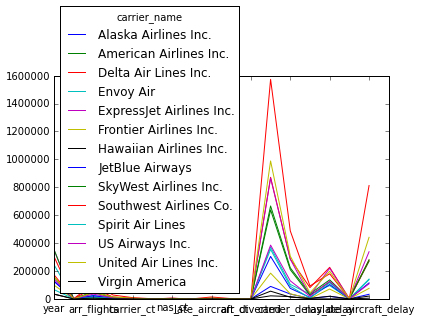

In [16]:
df[df.month == 6].groupby('carrier_name').sum().T.plot()

In [26]:
df[df.month == 6].groupby('carrier_name').arr_delay
#arr_delay.sum().sort_values('arr_delay',ascending=False)

In [53]:
date_df = df.groupby(['carrier_name','month'],as_index=False).arr_delay.mean()
# carr_delay = date_df.pivot(index='month',columns='carrier_name',values='arr_delay')
date_df.to_csv('carr_delay_2015.csv_',index=False)


In [55]:
date_df.max()

carrier_name    Virgin America
month                       10
arr_delay              18942.5
dtype: object

In [56]:
date_df.groupby('month').arr_delay.sum()

month
1     61449.947799
2     66552.539344
3     65010.503774
4     53752.282724
5     66892.117407
6     87561.612310
7     74956.827380
8     68881.627103
9     39392.528980
10    39668.904601
Name: arr_delay, dtype: float64